In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient(f, x, y):
    
        """ Calcula o gradiente de uma função f(x, y) em um ponto (x, y)."""

        dfdx = (f(x + 1e-5, y) - f(x, y)) / 1e-5
        dfdy = (f(x, y + 1e-5) - f(x, y)) / 1e-5

        return np.array([dfdx, dfdy])


In [3]:
def level_curve(f, x0, epsilon=1e-4, max_iterations=1000):
    
    points = [x0]  # Inicializa a lista de pontos com o ponto inicial x0
    x = np.array(x0, dtype=float)  # Inicializa a variável x com o ponto inicial x0

    for _ in range(max_iterations):
        grad = gradient(f, x[0], x[1])
        if np.linalg.norm(grad) < epsilon:
            break  # Condição de convergência

        step = epsilon * grad / np.linalg.norm(grad)
        x -= step
        points.append(x.copy())

    return np.array(points)

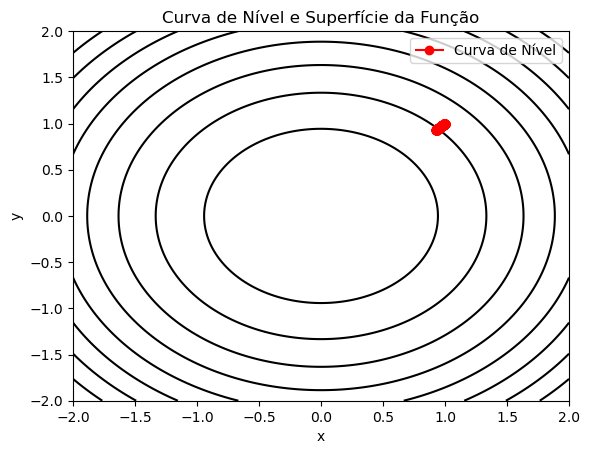

In [4]:
def plot_level_curve(f, x0, levels=10):

    x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    z = f(x, y)

    contour_levels = np.linspace(z.min(), z.max(), levels)
    plt.contour(x, y, z, contour_levels, colors='k')

    curve = level_curve(f, x0)
    plt.plot(curve[:, 0], curve[:, 1], marker='o', linestyle='-', color='r', label='Curva de Nível')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Curva de Nível e Superfície da Função')
    plt.legend()
    plt.show()

# Exemplo de função: f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

x0 = np.array([1.0, 1.0])  # Ponto inicial
plot_level_curve(f, x0)